# Online Learning Demonstration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import olac

import warnings


In [2]:
warnings.filterwarnings('ignore')

In [3]:
% load_ext autoreload
% autoreload 2
% matplotlib inline


In [4]:
plt.rcParams['figure.figsize'] = (12,5,)

In [5]:
balls_stream = olac.data_generators.roving_balls(steps=0, period=25000, balls=2)
# balls_stream = olac.data_generators.

In [6]:
# http://scikit-learn.org/stable/auto_examples/applications/plot_out_of_core_classification.html

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

clfs = {
    'SGD': SGDClassifier(),
    'Perceptron': Perceptron(),
    'NB Multinomial': MultinomialNB(alpha=0.01),
    'Passive-Aggressive': PassiveAggressiveClassifier(),
}


In [7]:
gridpoints = np.linspace(-10,10,250)
grid = []
for y in gridpoints:
    for x in gridpoints:
        grid.append([x,y])
        
grid = np.array(grid)


In [8]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import PolynomialFeatures
transformer = RBFSampler(n_components=100, gamma=0.075)
# transformer = PolynomialFeatures(degree=5)
gridt = transformer.fit_transform(grid)

In [9]:
clf = MLPClassifier((64,32,), batch_size=1, learning_rate='adaptive', early_stopping=False, 
                    alpha=0.0003, warm_start=False)
# clf = PassiveAggressiveClassifier()
# clf = Perceptron()
# clf = SGDClassifier()

In [10]:
label_frac = 0.1

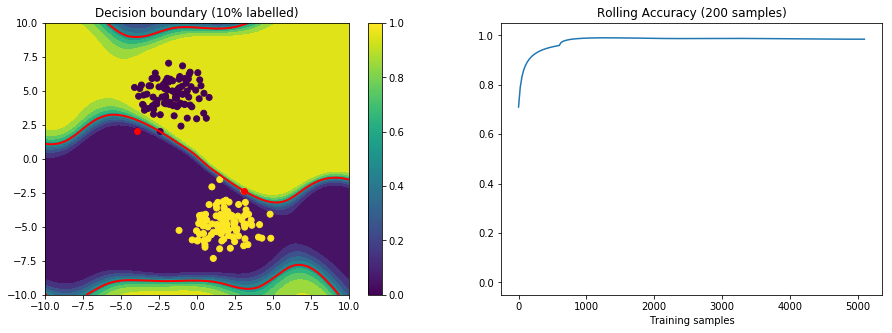

Overall after 5125 training examples: 0.9848


In [ ]:
test = []
train = []
pred_test = []
pred_train = []
accs = []

frame = 0

window = 200

acc_report_step = 25#int(5/label_frac)
last_report = -1

n_labels = 500000 / acc_report_step

for row in balls_stream:
    x = row[:-1].reshape(1,-1)
    y = row[-1].reshape(-1)
    
    xt = transformer.transform(x)
    
    if np.random.uniform() < label_frac:
        train.append(row)
        clf.partial_fit(xt, y, classes=[0,1])
        pred_train.append(clf.predict(xt))
        show = True
        
    elif len(train)>0:  # don't predict without fitting
        pred_test.append(clf.predict(xt))
        test.append(row)
        
    if (len(train)%acc_report_step == 0) and len(train) != last_report:
        last_report = len(train)
        test_arr = np.array(test)
        try:
            X_test = test_arr[:, :-1]  
            y_test = test_arr[:,-1].reshape(-1)
            y_test_pred = np.array(pred_test).reshape(-1)
        except:
            continue
    
        acc = np.mean(y_test == y_test_pred)
        accs.append(acc)

        plt.figure(figsize=(15,5))
        plt.subplot(121)
        
        try:
            Z = clf.predict_proba(gridt)[:,0].reshape(len(gridpoints), len(gridpoints))
            line = 0.5
        except:
            Z = clf.decision_function(gridt)[:].reshape(len(gridpoints), len(gridpoints))
            line = 0
        
        plt.contourf(gridpoints, gridpoints, Z, 10)
        
        plt.contour(gridpoints, gridpoints, Z, [line], colors=['r'], linewidths=2)
        plt.scatter(X_test[-window:,0], X_test[-window:,1], c=y_test[-window:])
        plt.colorbar()

        wrong = (y_test != y_test_pred)[-window:]
        plt.scatter(X_test[-window:,0][wrong], X_test[-window:,1][wrong], c='r')
        plt.title(f'Decision boundary ({label_frac:.0%} labelled)')

        plt.subplot(122)
        plt.plot(acc_report_step*np.arange(0,len(accs)), 
                 pd.Series(accs).rolling(acc_report_step, min_periods=0).mean())
        plt.ylim([-0.05,1.05])
        plt.xlabel('Training samples')
        plt.title(f'Rolling Accuracy ({window} samples)')
        
        frame += 1
        
#         plt.savefig(f'img/frame{frame}.png')

        plt.show()

        print(f'Overall after {len(train)} training examples: {acc:.4f}')
        display.clear_output(wait=True)
    
    if len(train) == n_labels:
        break
    
        
test_arr = np.array(test)
X_test = test_arr[:,:-1]  
y_test = test_arr[:,-1].reshape(-1)
y_test_pred = np.array(pred_test).reshape(-1)

train_arr = np.array(train)
X_train = train_arr[:,:-1]  
y_train = train_arr[:,-1].reshape(-1)
y_train_pred = np.array(pred_train).reshape(-1)



    
    

In [ ]:
import imageio

In [ ]:
import glob
import os

In [ ]:
images = []
i = 1
while os.path.isfile(f'img/frame{i}.png'):
    images.append(f'img/frame{i}.png')
    i += 1
images

In [ ]:
!mkdir img/gifs

In [ ]:
imageio.mimsave('img/gifs/onlineMLP.gif', [imageio.imread(f) for f in images])

![lol]('img/gifs/onlineMLP.gif')

In [ ]:
!ls img/gifs

In [ ]:
Z.shape

In [ ]:
s = pd.Series(accs)

In [ ]:
s.

In [ ]:
transformer.transform(x)

In [ ]:
transformer.fit_transform(grid).shape

In [ ]:
clf.decision_function(grid)